<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_AI_21_05_22/blob/main/CNN_Detect_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image

In [2]:
#Connect with my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Get dataset from drive
train_path = '/content/drive/MyDrive/AI/MonAn'
path_img = []
labels = ['BanhMi','Banhcuon','Banhtrangnuong','BunBo','Bunthitnuong','Comtam','Goicuon','HuTieu','Miquang','Pho']
x_train = []
y_train = []
x_test = []
y_test =[]
# Create dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(300,300)) # độ phân giải tùy ae chọn nhé!
      img = img_to_array(img)
      img = img.reshape(300,300,3) #hàm reshape phải có cùng độ phân giải với target_size của nhé
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

# Process data
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train)

In [4]:
#Create Model for train
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 720000)            0         
                                                                 
 dense (Dense)               (None, 256)               184320256 
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 184,323,722
Trainable params: 184,323,722
Non-trainable params: 0
__________________________________________

In [5]:
#Compile and Training
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
4/4 [==============================] - 12s 89ms/step - loss: 1.9712 - accuracy: 0.0900
Epoch 2/20
4/4 [==============================] - 0s 67ms/step - loss: 2.1966 - accuracy: 0.1400
Epoch 3/20
4/4 [==============================] - 0s 65ms/step - loss: 0.5580 - accuracy: 0.2400
Epoch 4/20
4/4 [==============================] - 0s 66ms/step - loss: 0.3583 - accuracy: 0.4000
Epoch 5/20
4/4 [==============================] - 0s 67ms/step - loss: 0.3034 - accuracy: 0.5100
Epoch 6/20
4/4 [==============================] - 0s 66ms/step - loss: 0.2739 - accuracy: 0.4700
Epoch 7/20
4/4 [==============================] - 0s 66ms/step - loss: 0.2339 - accuracy: 0.6900
Epoch 8/20
4/4 [==============================] - 0s 67ms/step - loss: 0.2004 - accuracy: 0.7900
Epoch 9/20
4/4 [==============================] - 0s 66ms/step - loss: 0.1629 - accuracy: 0.9200
Epoch 10/20
4/4 [==============================] - 0s 67ms/step - loss: 0.1293 - accuracy: 0.9400
Epoch 11/20
4/4 [===========

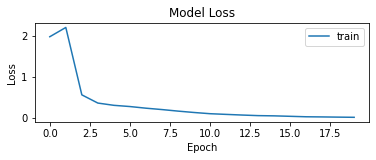

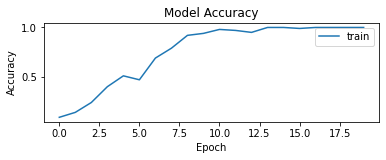

In [6]:
#Draw plot and make evaluate
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

This is: Banhtrangnuong


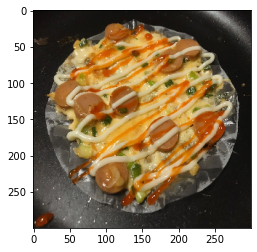

In [10]:
#Check detect
img = image.load_img('/content/drive/MyDrive/AI/MonAn/Banhtrangnuong/Banhtrangnuong_8.jpg', target_size=(300,300)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,300,3) 
img = img.astype('float32')
img = img/255
print('This is: '+ labels[np.argmax(model.predict(img))])

Day la HuTieu


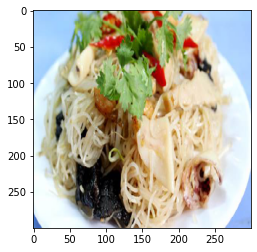

In [11]:
img1 = image.load_img('/content/drive/MyDrive/AI/MonAn/HuTieu/HuTieu_7.jpg', target_size=(300,300)) 
plt.imshow(img1)
img1 = img_to_array(img1)
img1 = img1.reshape(1,300,300,3) 
img1 = img1.astype('float32')
img1 = img1/255
print('Day la '+ labels[np.argmax(model.predict(img1))])

Day la BunBo


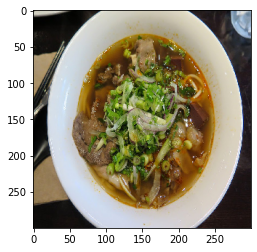

In [12]:
img2 = image.load_img('/content/drive/MyDrive/AI/MonAn/BunBo/BunBo_9.jpg', target_size=(300,300)) 
plt.imshow(img2)
img2 = img_to_array(img2)
img2 = img2.reshape(1,300,300,3) 
img2 = img2.astype('float32')
img2 = img2/255
print('Day la '+ labels[np.argmax(model.predict(img2))])
